# <font color="##00BFFF"> Projet  Analyse de données  
## M1 MIAGE Dauphine   2022 </font>


## Données : 

Ce jeu de données provient du National Institute of Diabetes and Digestive and Kidney Diseases. L'objectif de ce jeu de données est de prédire de manière diagnostique si un patient est diabétique ou non, en fonction de certaines mesures diagnostiques incluses dans le jeu de données. Plusieurs contraintes ont été imposées à la sélection de ces instances à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes âgées d'au moins 21 ans et d'origine indienne Pima.

Le jeu de données se compose de plusieurs variables prédictives médicales et d'une variable cible, le résultat. Les variables prédictives comprennent : 

- Pregnancies: Nombre de grossesses

- Glucose: Concentration de glucose dans le plasma après 2 heures lors d'un test de tolérance au glucose par voie orale.
    
- BloodPressure: Pression artérielle diastolique (mm Hg)
    
- SkinThickness: Épaisseur du pli cutané du triceps (mm)
    
- Insulin: Insuline sérique à 2 heures (mu U/ml)
    
- BMI: Indice de masse corporelle (poids en kg/(taille en m)^2)
    
- DiabetesPedigreeFunction: Fonction de pedigree de diabète
    
- Age: Age (années)
    
- Outcome: Variable de classe (1 si la femme est diabétique et 0 sinon)


Source :  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

# Table des matières  : 
1. [Importation des données et découverte](#exo1)
2. [Statistiques descriptives](#exo2)
3. [Regression Logistique](#exo3)
4. [Classification](#class)
5. [K-means Clustering](#kmclustering)
6. [K-means Prediction](#kmprediction)
7. [Naive Bayésien ](#Naive)
7. [Descente de Gradient ](#SGDC)
9. [Arbre de décision ](#Tree)
10. [Forêts aléatoire ](#Trees)
11. [Oversampling](#Over)
12. [Conclusion ](#Conclusion)
13. [Autres approche ](#autre)

##  <a id ='exo1'> 2.1 Importation des données et découverte</a>

In [698]:
# Importation des librairies Python
import matplotlib.pyplot as plt  # graphique
import seaborn as sns # graphique
import numpy as np  # vector
import pandas as pd  # dataframe
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression # ML
from sklearn.metrics import classification_report # ML
from sklearn.metrics import confusion_matrix # ML
from sklearn.cluster import KMeans # ML
from sklearn.neighbors import KNeighborsClassifier # ML
import sklearn.neighbors as nei # ML 
import sklearn.model_selection as mod# ML
from sklearn.naive_bayes import MultinomialNB # ML 
from sklearn.model_selection import cross_val_score # ML
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, precision_recall_curve # ML
from sklearn.metrics import recall_score # ML
import warnings # supprimer les warnings pour jupyer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler # Oversampling
from sklearn.linear_model import SGDClassifier
# Methode pour afficher le F1,precision, recall ...
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import MinMaxScaler

In [699]:
#Importation du jeu de données
data = pd.read_csv('data\diabetes.csv')

On vérifie que le jeu de données est bien importé en regardant les dimensions, le header, et les index de colonnes.
On a 768 observations et 9 variables.

In [700]:
# dimension du jeu de données
data.shape

(768, 9)

In [701]:
#Index des colonnes 
data_index = data.columns
data_index

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [702]:
# On regarde l'encodage des diffréntes variables 
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [703]:
# On affiche le header 
data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


Dans un premier temps, nous avons regardé s’il n’y avait pas de valeurs manquantes (NA en anglais). En effet, s’il y a eu des valeurs manquantes, il aurait fallu soit remplacer par la moyenne ou la médiane ou de manière plus brutale, supprimer ces observations. Notre jeu de données étant de petite taille (768 observations), on aurait privilégié la 1ère approche. 

In [704]:
# On regarde si on a des valeurs manquantes 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##  <a id ='exo2'> Statistiques descriptives </a>

Pour mieux appréhender notre jeu de données, nous allons faire un peu de statistiques descriptives. 

In [705]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


On remarque qu'on n'a pas de valeurs aberrantes concernant l'IMC,l'âge ou d'autres valeurs.


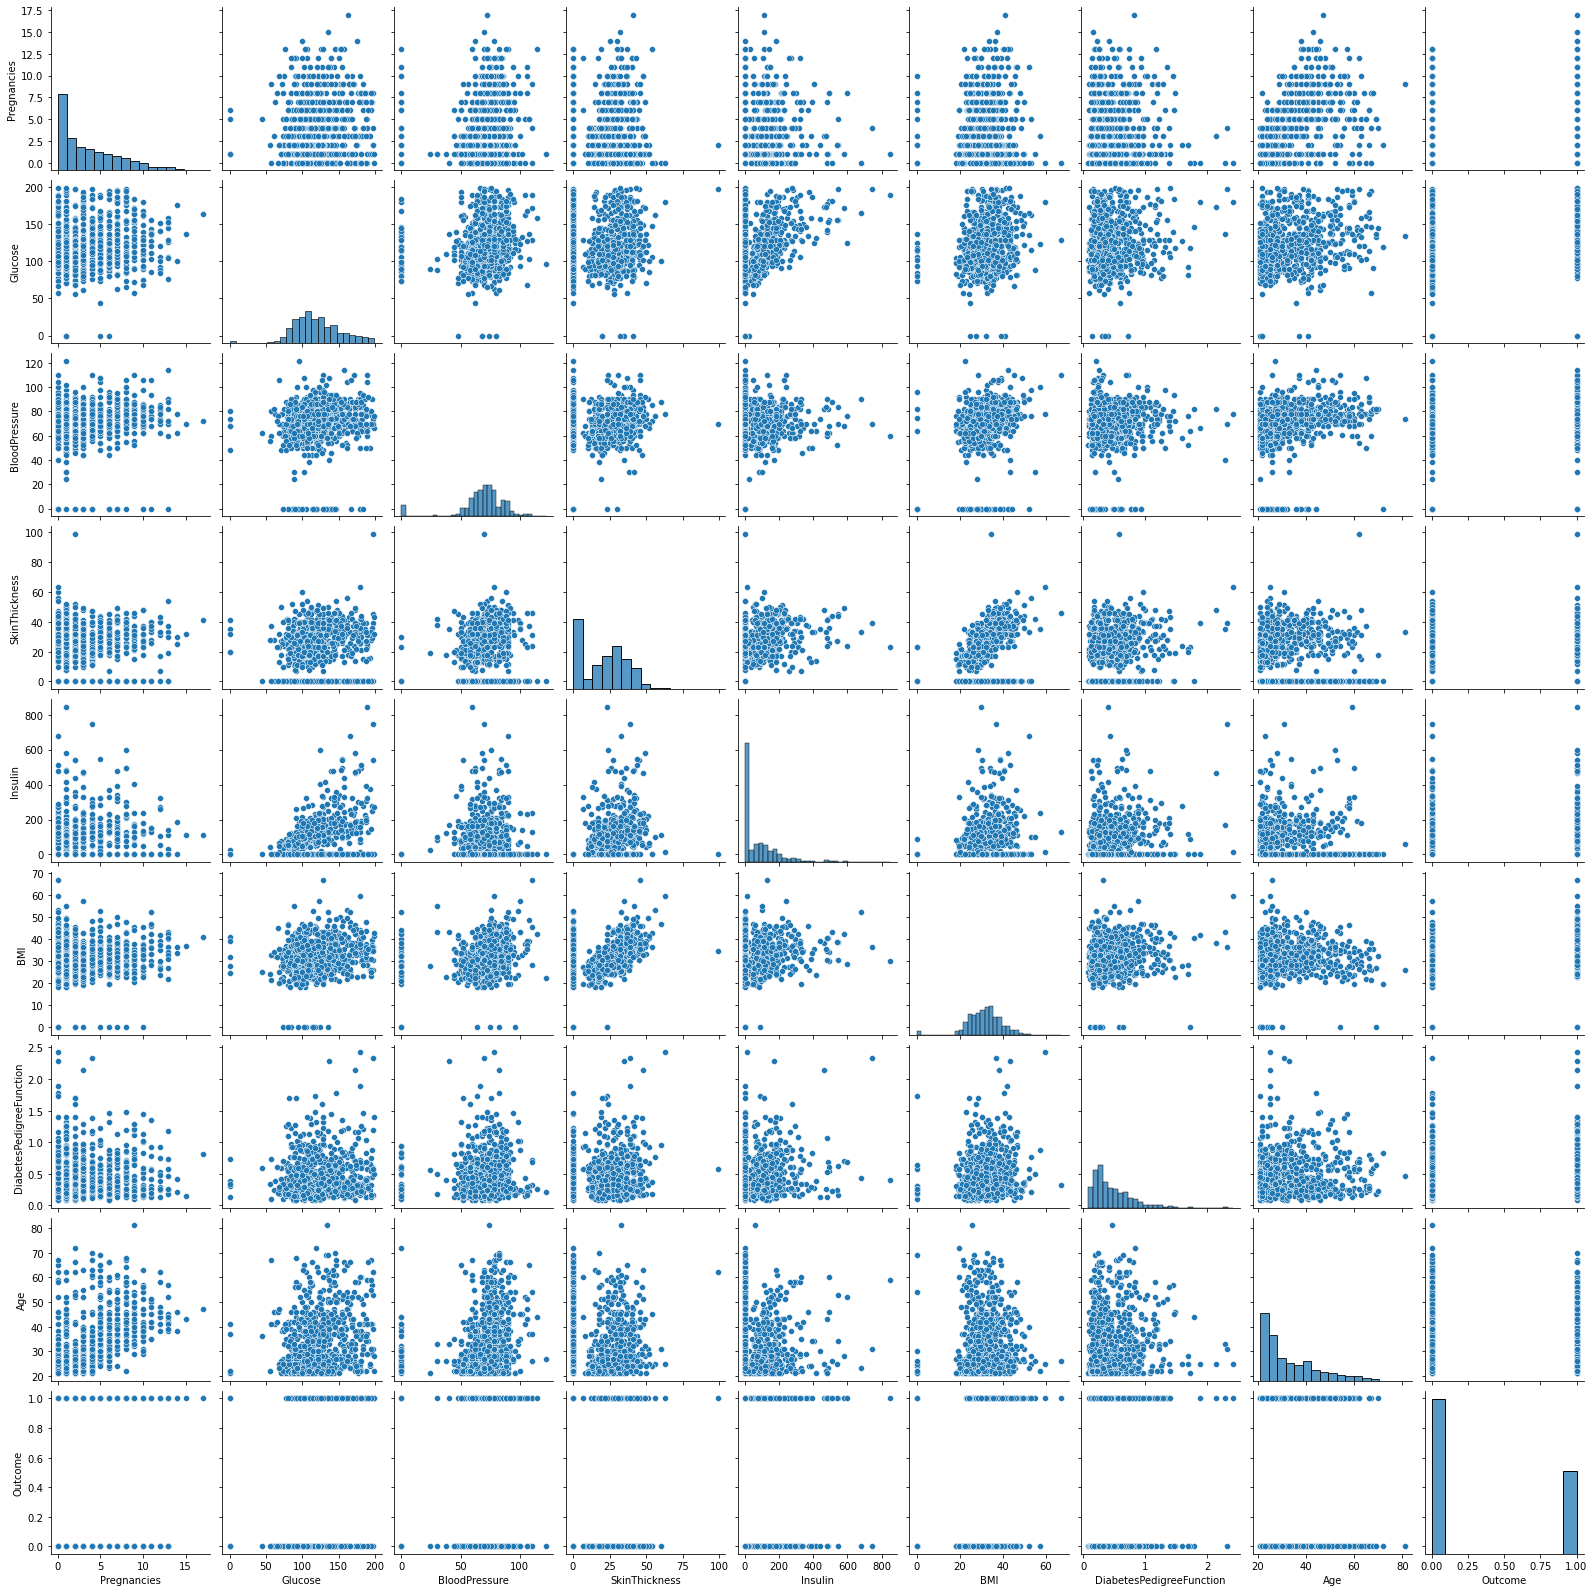

In [706]:
# Affichage des plots
sns.pairplot(data)
plt.show()

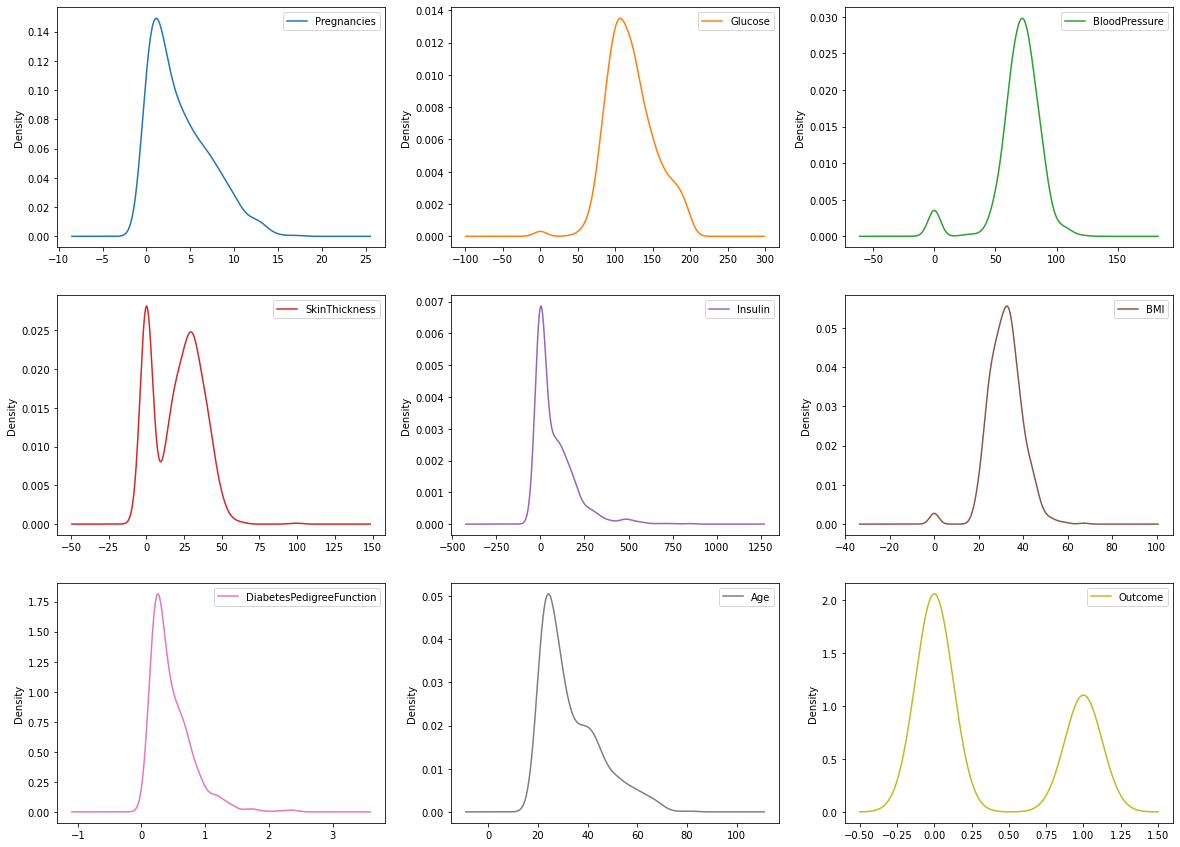

In [707]:
# Affichage plot ave densité
data.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

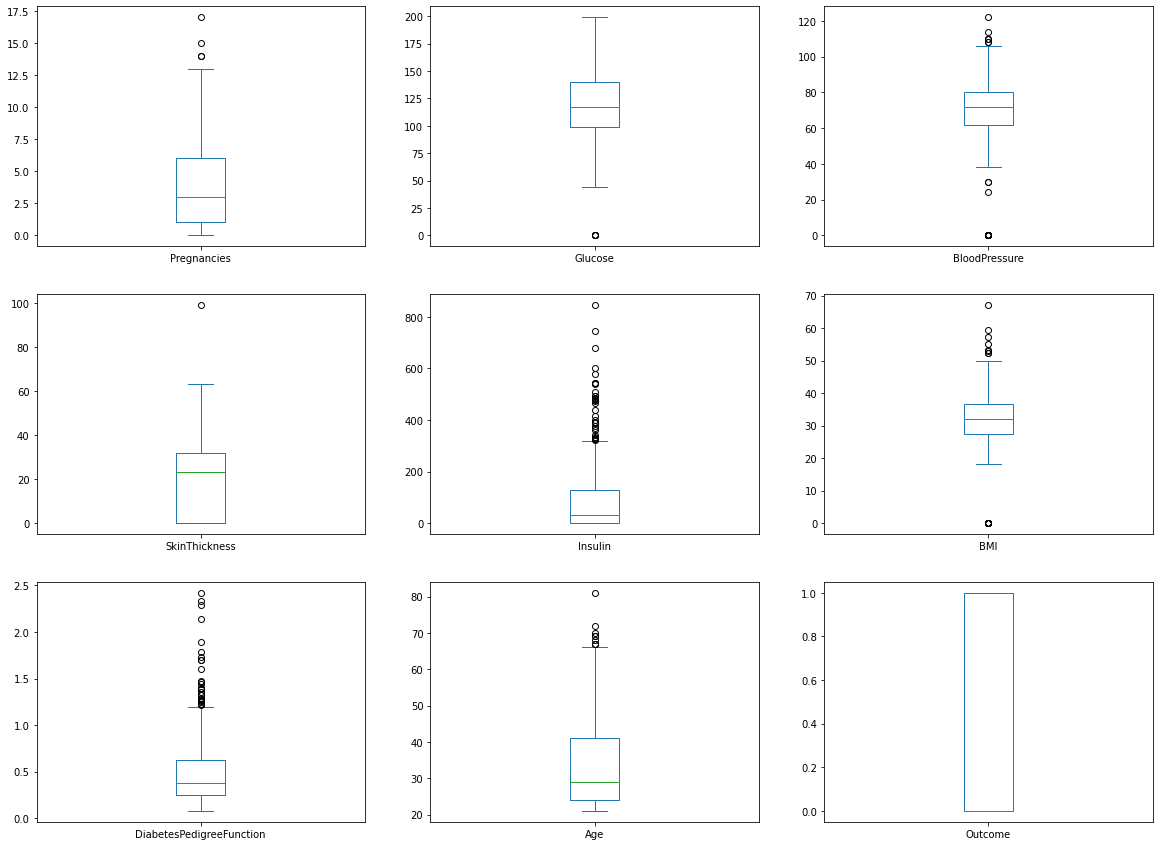

In [708]:
#Boîtes de valeurs  pour visualiser la distribution de tous les attributs du jeu de données.
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))
plt.show()

Pour rappel, la médiane est représentée par la ligne dans la boîte. La moitié des observations lui sont inférieures ou égales et la moitié des observations lui sont supérieures ou égales.

La boîte représente  l'étendue interquartile, c'est à dire la distance entre les premier et troisième quartiles (Q1-Q3). 

Les moustaches s'étendent des deux côtés de la boîte représentent les plages des 25 % inférieurs et des 25 % supérieurs des valeurs de données, à l'exclusion des valeurs aberrantes. 

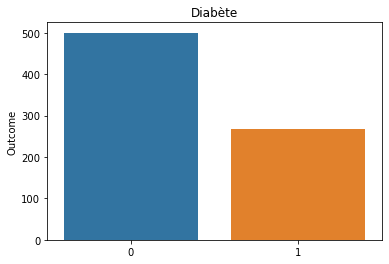

In [709]:
# Affichage d'un boxplot sur la variable Outcome
sns.barplot(data['Outcome'].value_counts().index,data['Outcome'].value_counts()).set_title('Diabète')
# Supprimer les warnings du rapport du notebook
warnings.filterwarnings('ignore')
plt.show()


In [710]:
# Calcul de Outcome en chiffre absolu
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [711]:
# calcul Outcome en % 
data['Outcome'].value_counts()/data['Outcome'].count()

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

On observe qu'au sein de nos données, il y a davantage de femmes qui n'ont pas de diabète que de de personnes qui l'ont. 
En effet, sur 768 observations, on a 500 non diabétique soit 65% de l'effectif total et 268 diabètique soit 35% de l'échantillon.
Cela peut nous suggérer que dans nos modèles, il faudra peut être utiliser de l'over sampling pour améliorer la qualité de notre échantillon.

## Correlation

On rapelle que plus le coefficent est compris entre -1 et 1.
- Si il est proche de 1,  la variable est correlé positivement.
- Si il est proche de -1,  la variable est correlé négativement.
- Si il est proche de 0,  la variable n'est pas correlé.

Il existe pas de corrélations vraiment très fortes dans notre jeu de données.
Les plus fortes sont : 
- L'âge et le nombre de grosseses (0.54). Plus une femme est âgé plus elle a était enceinte.

- Glucose et Outcome (0.47). Les femmes qui ont un taux de glucose plus élevé ont tendance à avoir un taux d'insuline plus élevé et à souffrir de diabète.

- Épaisseur du pli cutané et l' IMC (0,66) - Les femmes dont l'épaisseur du pli cutané est plus élevée ont un IMC plus important (et sont probablement en surpoids ou obèses).

- Le Glucose et l'insuline (0,33)

On utilise la distance de Pearson, mais on aurait pu utiliser celui de Kendall ou de Spearman. 
Le coefficient de corrélation linéaire  (Pearson) permet de calculer la dépendance entre deux variables quantitatives. Les deux échantillons sont supposés suivre une distribution de loi normale. 

In [712]:
# Affichage d'une matrice de corrélation avec la méthode de Pearson
corr_matrix_pearson = data.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


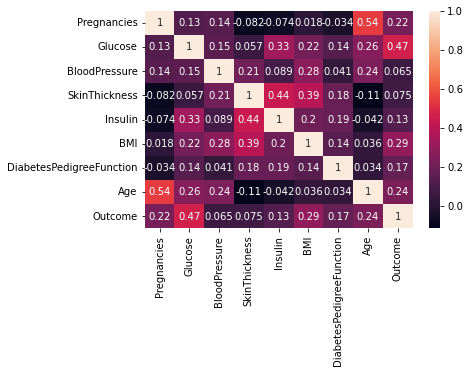

In [713]:
# De maanière, plus graphique
sns.heatmap(corr_matrix_pearson, annot = True)
plt.show()

#  <a id ='class'> Classification </a>

##  <a id ='exo3'> Regression logistique </a>
Comme Outcome est une variable binaire, il faut utiliser une régression logistique.

La régression logistique est un algorithme d'apprentissage supervisé permettant de faire de la classification. Il s'agit d'une méthode largement utilisée pour prédire la probabilité d'un résultat binaire, comme la probabilité qu'un individu soit atteint d'une certaine maladie, compte tenu de certaines caractéristiques (traits) de cet individu.

Le modèle de régression logistique estime la probabilité qu'une observation donnée appartienne à une certaine classe, en fonction des valeurs des variables prédictives. Cette probabilité est ensuite transformée en une prédiction binaire à l'aide d'une valeur seuil, généralement 0,5. Si la probabilité prédite est supérieure à 0,5, le modèle prédit la classe positive (1), et si elle est inférieure à 0,5, le modèle prédit la classe négative (0).

In [714]:
variables=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=data[variables]
y=data.Outcome

In [715]:
# On normalise les données 
scaler = StandardScaler()
scaler. fit(X)
X_scaled = scaler.transform(X)

#on normalise tout le jeu 
scaler.fit(data)
data_scaled = scaler.transform(data)

In [716]:
# On définit  un modèle et on attribue Y (variable dépendante) et X (variable indépendante)
logit_model=sm.Logit(y,X_scaled)

# Ajustement du modèle et affichage des résultats
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530720
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sat, 14 Jan 2023   Pseudo R-squ.:                  0.1795
Time:                        22:04:32   Log-Likelihood:                -407.59
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 4.458e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3903      0.106      3.665      0.000       0.182       0.599
x2             1.0879      0.

Ce modèle explique 53.1% de la variation de la variable dépendante (outcome). 
On a de nombreuses valeurs qui ont des p-values supérieurs à 5%, ce qui signifie que l'on pourrait les éliminer du modèle et peut être obtenir de meilleur résultats.

Les variables que l'on peut éliminer sont l'épaisseur de la peau (SkinThickness), l'IMC (BMI), la fonction du pedigree du diabète (DiabetesPedigreeFunction) , l'âge (Age) et l'insuline (Insulin). 


In [717]:
# On refait avec les variables avec des p-valeurs inféreures à 1 % 
variables2=["Pregnancies", "Glucose","BloodPressure"]
X2=X[variables2]
# On normalise X2
scaler = StandardScaler()
scaler. fit(X2)
X2_scaled = scaler.transform(X2)

y=data.Outcome
# On définit  un modèle et on attribue Y (variable dépendante) et X (variable indépendante)
logit_model=sm.Logit(y,X2_scaled)

# Ajustement du modèle et affichage des résultats
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.566146
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      765
Method:                           MLE   Df Model:                            2
Date:                Sat, 14 Jan 2023   Pseudo R-squ.:                  0.1247
Time:                        22:04:32   Log-Likelihood:                -434.80
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.257e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3972      0.085      4.653      0.000       0.230       0.564
x2             1.1313      0.

On observe que ce modèle explique 56,6% de la variation de la variable dépendante (outcome). Il est donc meilleur que le précédent d'autant que toutes les variables ont des p-values inférieures à 1 % ce qui est plutôt bon.

In [718]:
logreg = LogisticRegression()
logreg.fit(X2_scaled,y)
# On définit la variable y_pred pour les valeurs de prédiction. 
y_pred=logreg.predict(X2)

# On calcul de la précision du modèle
report_logistic = classification_report(y,y_pred)
print(report_logistic)
# pour constuire la table de resume
precision_logistic,recall_logistic,fscore_logistic,support_logistic=score(y,y_pred,average='weighted')

              precision    recall  f1-score   support

           0       0.60      0.01      0.01       500
           1       0.35      0.99      0.52       268

    accuracy                           0.35       768
   macro avg       0.47      0.50      0.26       768
weighted avg       0.51      0.35      0.19       768



La precision du modele est d'environ 51%.

- Average=macro la fonction est calculé pour chaque étiquette, et retourne la moyenne sans considérer la proportion pour chaque étiquette dans l'ensemble de données.
- Average=weighted la fonction est calculé pour chaque étiquette, et retourne la moyenne en considérant la proportion pour chaque étiquette dans l'ensemble de données.



##  <a id ='kmclustering'> K-means clustering </a>

Nous allons effectuer un clustering avec l'algorithme du k-means.

In [719]:
# On essaye l'algo du k-means avec un nombre fini de clusters

kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scaled)
# On peut calculer l'inertie.
kmeans.inertia_

4156.227155351578

Ici on a essayé avec 5 cluster mais c'est un choix purement aléatoire de notre part, on va donc essayer de trouver un meilleur k, c'est-à-dire un k qui minimise l'inertie et le nombre de clusters.

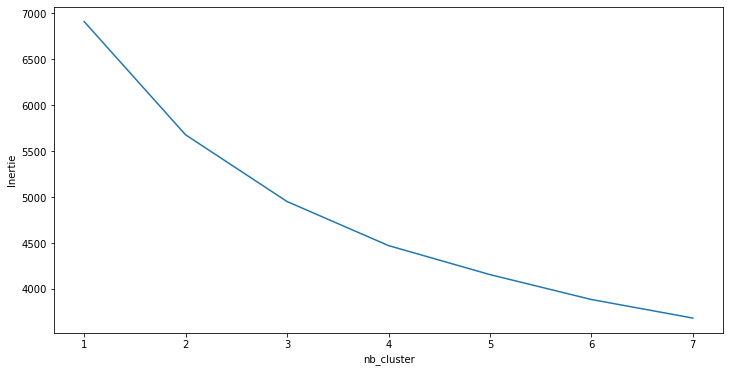

In [720]:
# On definit le nombre de clusters que l'on veut essayer
k_cluster = range(1,8)
# On créer une liste vide pour stocker l'inertie
intertie = []
#Pour chaque valeur de k, on va  entrainer un k-means spécifique et on stocke son inertie : 
for i in k_cluster :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_scaled) 
  intertie.append(kmeans.inertia_)

# Affichage de l'inertie en fonction des clusters (méthode du coude)
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Inertie")
ax.set_xlabel("nb_cluster")
ax = plt.plot(k_cluster, intertie)

D'après la méthode du coude, on obtient 4 clusters distincts. On peut réafficher les variables avec les clusters pour voir à quoi cela ressemble. Sinon la seconde méthode pour le choix du nombre k de cluster consiste à prendre +1 et -1 du cluster choisi on aurait donc pu prendre 3, 4 ou 5.

In [721]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_scaled)
df = data
kmeans.labels_
lab = {i:j for i,j in enumerate(list("abcd"))}
lab
labels = [lab[i] for i in kmeans.labels_]
df["cluster"] = labels
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,35,0,33.6,0.627,50,1,b
1,1,85,66,29,0,26.6,0.351,31,0,d
2,8,183,64,0,0,23.3,0.672,32,1,b
3,1,89,66,23,94,28.1,0.167,21,0,d
4,0,137,40,35,168,43.1,2.288,33,1,a


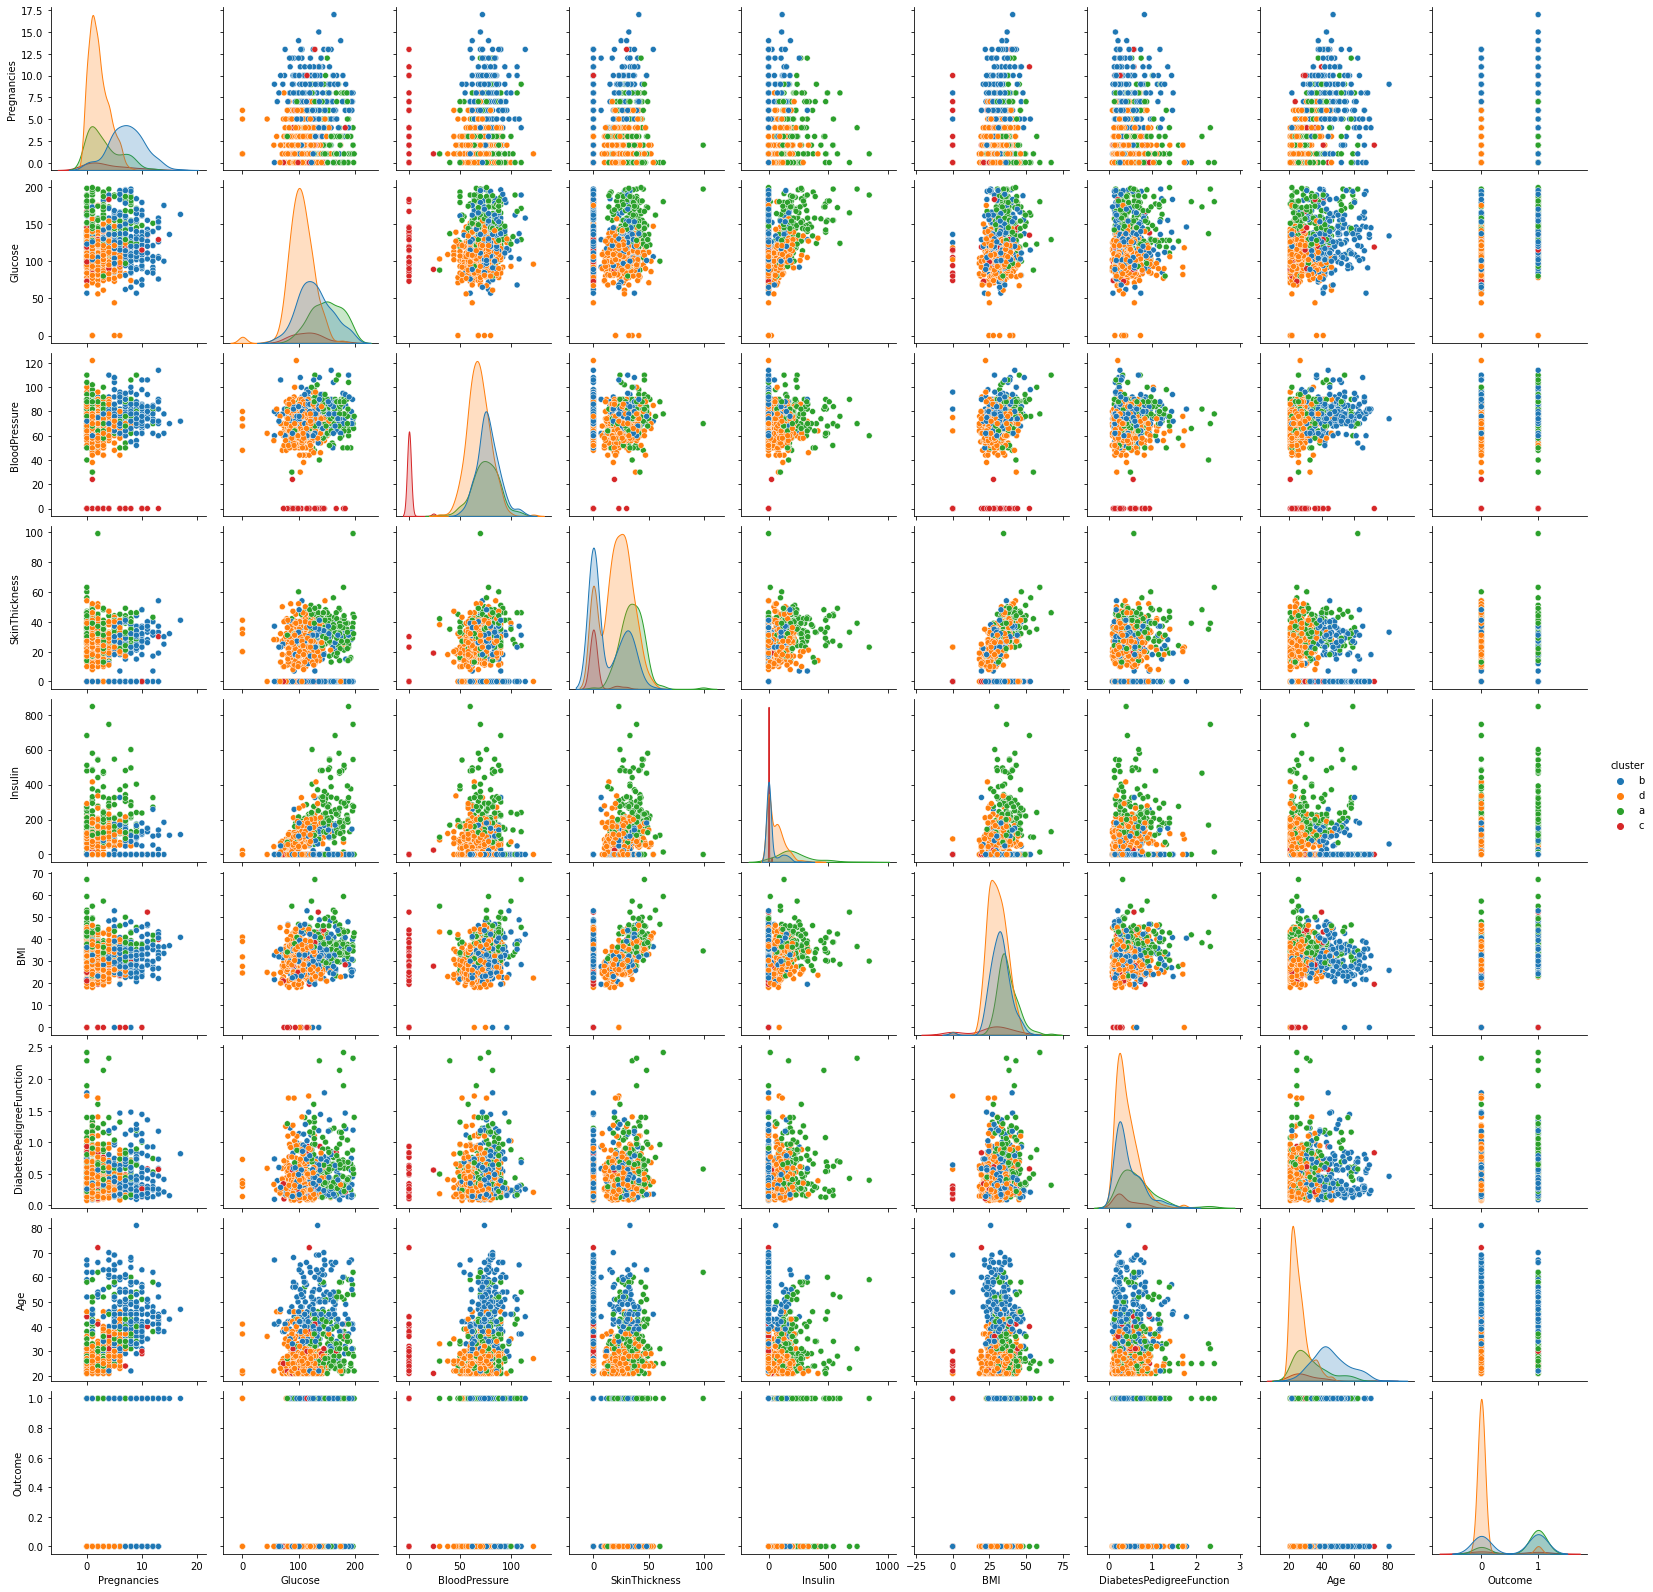

In [722]:
sns.pairplot(df, hue="cluster")
plt.show()

Si on refait le même traitement mais avec seulement les variables triés par la régression logistique pour prédire le diabète, p, obtient 4 clusters  :

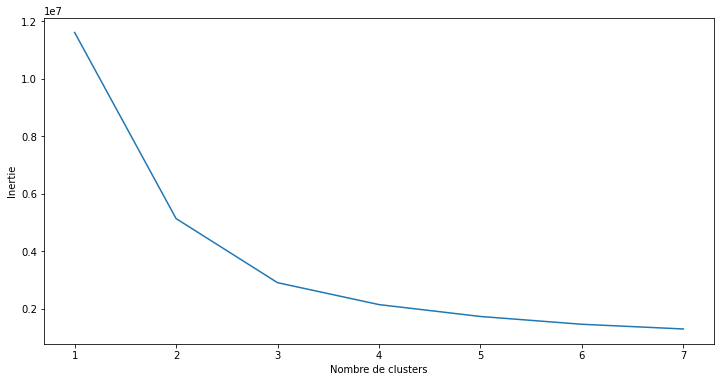

In [723]:
# On definit le nombre de clusters que l'on veut essayer
k_cluster = range(1,8)
# On créer une liste vide pour stocker l'inertie
intertie = []
#Pour chaque valeur de k, on va  entrainer un k-means spécifique et on stocke son inertie : 
for i in k_cluster :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X) 
  intertie.append(kmeans.inertia_)

# Affichage de l'inertie en fonction des clusters (méthode du coude)
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Inertie")
ax.set_xlabel("Nombre de clusters")
ax = plt.plot(k_cluster, intertie)

In [724]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
df2 = X

# Supprimer les warnings du rapport du notebook
warnings.filterwarnings('ignore')

lab = {i:j for i,j in enumerate(list("abcd"))}
lab
labels = [lab[i] for i in kmeans.labels_]
labels[:10]
df2["cluster"] = labels
kmeans.inertia_

3918.952267495887

Avec 4 clusters, on observe de grosses différences, de plus l'inertie du modèle est beacoup plus faible.

Il aurait pu être intéressant de développer un modèle adapté à chaque cluster afin d'avoir des résultats pertinents. Le problème de cette approche est le fait que note jeu de données est déjà un échantillon assez faible. Ainsi, cette méthode n'est pas viable.

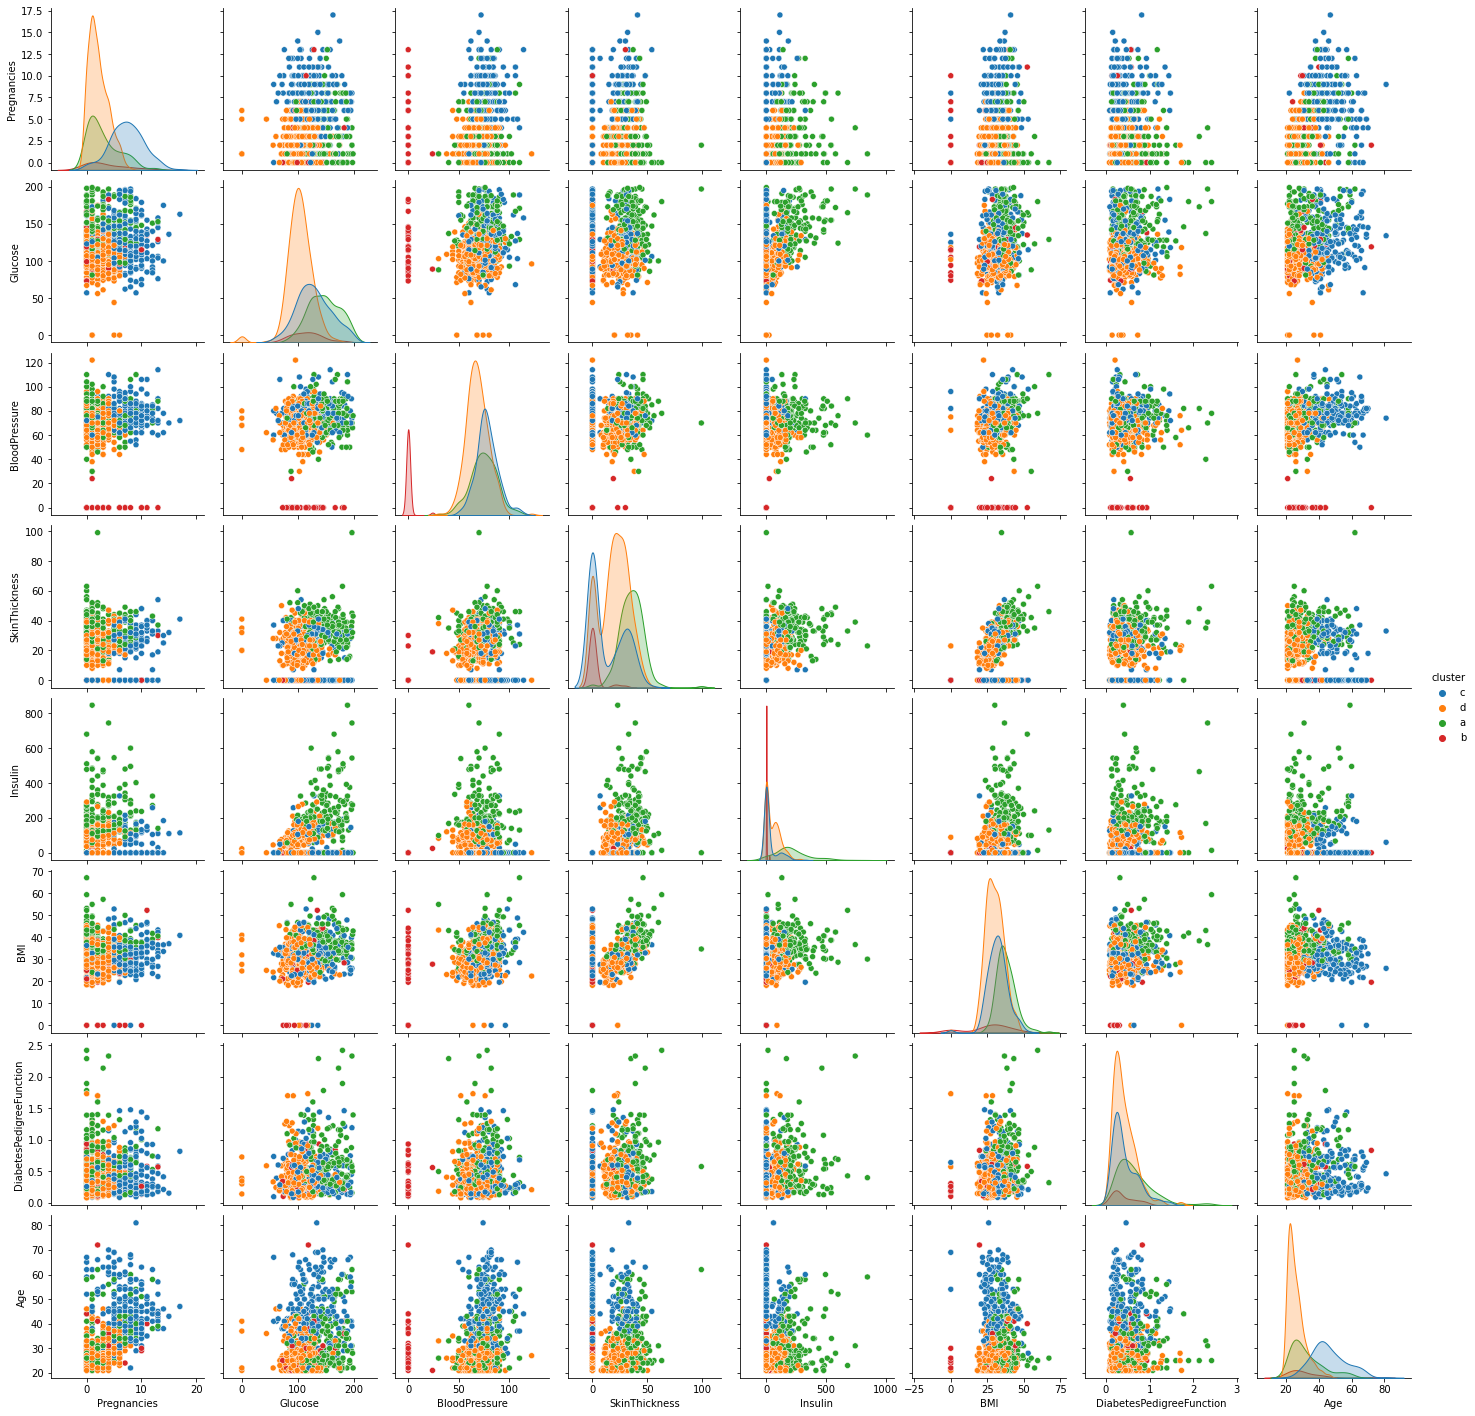

In [725]:
sns.pairplot(df2, hue="cluster")
plt.show()

##  <a id ='kmprediction'> K Plus proches voisins </a>

L'algorithme <b>K plus proches voisins (KNN)</b> est un algorithme de classification supervisée basé sur l'apprentissage par similarité. Il fonctionne en comparant une observation inconnue à celles des données d'entraînement déjà étiquetées et en prédisant la classe la plus fréquente parmi les K observations les plus proches.



Dans un premier temps, on cherche la valeur optimale du k. En effet, la valeur du k est est un hyperparametre et le résultat de l'algorythme peut varier du tout au tout.

Pour rappel,

- Un k trop <b>petit</b> rend le modèle extrémement sensible aux valeurs abbérantes. Ainsi, on obtiendra du bruit dans nos prédictions.

- Un k trop <b>grand</b> le voisinage risque de contenir des points des autres classes et fausser le résultat.

- Quand k grandit la frontière de décision devient plus lisse et régulière.

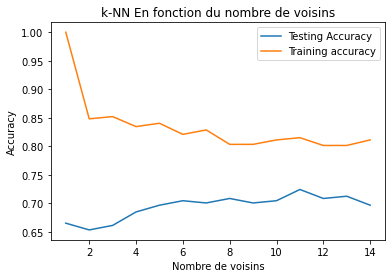

In [726]:
# On découpe notre jeu de données en en ensemble d'entrainement et un ensemble de test.
X_train, X_test, Y_train, Y_test = mod.train_test_split(inputs_scaled,outputs, test_size =0.33)


# On boucle tester l'accuracy 
k_range = np.arange(1,15)
train_accuracy =np.empty(len(k_range))
test_accuracy = np.empty(len(k_range))
for i,k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test) 
    
plt.title('k-NN En fonction du nombre de voisins')
plt.plot(k_range, test_accuracy, label='Testing Accuracy')
plt.plot(k_range, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Accuracy')
plt.show()

On en on conclue que le meilleur  k est 7.

In [727]:
# On découpe notre jeu de données en en ensemble d'entrainement et un ensemble de test.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs_scaled,outputs, test_size =0.33)

knn = nei.KNeighborsClassifier(n_neighbors=4)
knn.fit(inputs_train, outputs_train)
(knn.predict(inputs_test) == outputs_test).sum()

167

In [728]:
#On compte combien de femmes sont positives (1) et négatives (0) pour le diabète dans l'ensemble de test. 
outputs_test.value_counts()

0    153
1    101
Name: Outcome, dtype: int64

Le <b>recall</b>, la <b>précision</b> et le <b>F1-score</b> sont des métriques couramment utilisées pour évaluer la performance d'un modèle de classification. Le recall mesure la proportion de vrais positifs dans l'ensemble des cas positifs réels, c'est-à-dire la capacité du modèle à détecter tous les cas positifs. La précision mesure la proportion de vrais positifs parmi l'ensemble des cas positifs prédits, c'est-à-dire la capacité du modèle à éviter les faux positifs. Le F1-score est une métrique combinant recall et précision, elle est calculée en utilisant un équilibre entre les deux. Utiliser ces différentes métriques permet de comprendre les performances de notre modèle de manière complète pour prendre des décisions éclairées concernant son utilisation.

In [760]:
def afficherScore(precision,recall,fscore):
    print ('Precision : {}'.format(precision))
    print ('Recall    : {}'.format(recall))
    print ('F1-score   : {}'.format(fscore))

In [730]:
#on recupere les scores pour tableau resume
precision_kvoisin,recall_kvoisin,fscore_kvoisin,support_kvoisin=score(outputs_test,outputs_pred,average='weighted')
#fonction pour afficher les resultats
afficherScore(precision_kvoisin,recall_kvoisin,fscore_kvoisin)

Precision : 0.5626160185786111
Recall    : 0.5669291338582677
F-score   : 0.5644646410956872


On a une precison ou accuracy de 0.56 et un recall de 0,56 pour ce modèle.
Pour rappel,l'accuray  est la somme de tous les vrais positifs et vrais négatifs qu'on divise par le nombre total d'instances. Il répond à la question suivante : de toutes les classes positives et négatives, combien parmi elles ont été prédites correctement ?

In [731]:
# Validation croisée 10 fois avec knn = 5
scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
# On fait la moyenne des scores de précision
scores.mean()


0.7122180451127821

On a donc en moyenne une précision de 0.71 pour ce modèle avec la cross validation

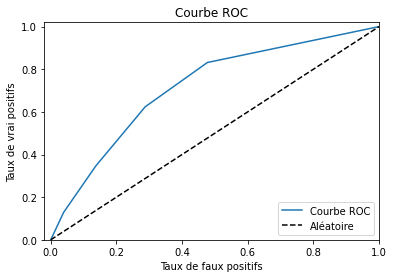

In [732]:
# On recupere les probas pour la courbe ROC
out_pred_prob = knn.predict_proba(inputs_test)[:,1]
out_pred_prob

fpr, tpr, thresholds = roc_curve(outputs_test, out_pred_prob)
# Creation de la Courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
_ = plt.xlabel('Taux de faux positifs')
_ = plt.ylabel('Taux de vrai positifs')
_ = plt.title('Courbe ROC')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [733]:
# On calcule et affiche l'AUC c'et à dire l'aire sous la courbe ROC
roc_score_auc = roc_auc_score(outputs_test, out_pred_prob)
round(roc_score_auc,2)


0.72

Ce classifieur est est plutôt bon, en effet on a un AUC de 0.74.
Notre courbe est au dessus de 0.5 ce qui signifie que notre modèle est plus performant qu'un classifeur aléatoire.

##  <a id ='Naive'> Classifieur naïf bayésien </a>

Un classifieur bayésien est un type d'algorithme de classification basé sur les théorèmes de probabilité de Bayes. Il utilise les probabilités conditionnelles pour prédire la classe d'une observation inconnue en se basant sur les caractéristiques de cette observation.

Le principe de base d'un classifieur bayésien est que chaque classe a une distribution de probabilité connue pour chaque caractéristique, et que ces distributions de probabilité sont indépendantes entre les différentes caractéristiques. Ainsi, pour prédire la classe d'une observation inconnue, il suffit de calculer la probabilité de cette observation pour chaque classe en utilisant les distributions de probabilité connues. La classe avec la probabilité la plus élevée est choisie comme prédiction pour l'observation inconnue.


Cette fois, on va essayer un classifieur naif bayésien pour voir si l'on obtient de meilleurs résultat qu'avec le knn.
Cette algorythme est assez performant en terme de temps d'éxécution mais moins en terme de classification

Le problème avec classifieur est qu'il ne prend pas de valeurs négatif en X. Alors que nos données sont centrées et réduire, du coup, nous allons les laisser comme ça.

In [734]:
#On supprime la variable cluster car qualitative
del X['cluster']

In [735]:
X_train_bayes, X_test_bayes, Y_train_bayes, Y_test_bayes = mod.train_test_split(X,y, test_size =0.33)
#Creation du classificateur naive bayes
mnb = MultinomialNB()
mnb.fit(X_train_bayes, Y_train_bayes)
out_pred = mnb.predict(X_test_bayes)

On a une précision de 0.57, ce qui est inférieur au précédent modèle.

In [736]:
precision_bayes,recall_bayes,fscore_bayes,support_bayes=score(Y_test_bayes,out_pred,average='weighted')

#fonction pour afficher les resultats
afficherScore(precision_bayes,recall_bayes,fscore_bayes)

Precision : 0.5762151554933114
Recall    : 0.5866141732283464
F-score   : 0.5781463837396502


Pour rappel, le Recall  ou  rappel  permet de mesurer le nombre de prévisions positives correctes sur le nombre total de données positives. Il permet de répondre à la question suivante : sur tous les enregistrements positifs, combien ont été correctement prédits ?

### Courbe ROC

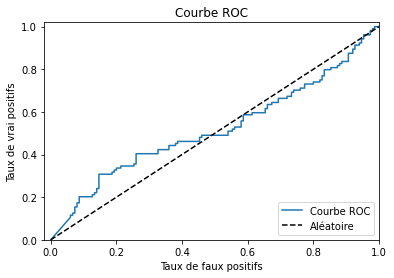

In [737]:
# On recupere les probas pour la courbe ROC
out_pred_prob = mnb.predict_proba(X_test_bayes)[:,1]
out_pred_prob

fpr, tpr, thresholds = roc_curve(Y_test_bayes, out_pred_prob)
# Creation de la Courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
_ = plt.xlabel('Taux de faux positifs')
_ = plt.ylabel('Taux de vrai positifs')
_ = plt.title('Courbe ROC')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [738]:
roc_score_auc = roc_auc_score(outputs_test, Y_test_bayes)
round(roc_score_auc,2)

0.43

Ce classifieur est vraiment mauvais puisqu'il est moins bon qu'un classifieur qui classifierait de manière aléatoire les observations. En effet, on a un AUC (aire sous la courbe) de 0.43.

Pour rappel, cette croube <b>(Receiver Operating Characteristic)</b> représente la sensibilité en fonction de 1 – spécificité pour toutes les valeurs seuils possibles du marqueur étudié. La sensibilité est la capacité du test à bien détecter les malades et la spécificité est la capacité du test à bien détecter les non-malades.

L'<b>AUC </b> peut être interprétée comme la probabilité que, parmi deux sujets choisis au hasard, un malade et un non-malade, la valeur du marqueur soit plus élevée pour le malade que pour le non-malade. Par conséquent, une AUC de 0,5 (50%) indique que le marqueur est non-informatif. 

##  <a id ='Tree'> Arbre de décision </a>

Pour ce modèle, nous allons utiliser les arbres à décision.
Cet algorithme utilise la fonction entropie et le gain d’information pour décider quelle est la meilleure caractéristique.

L'algorithme de l'arbre de décision est l'un des algorithmes d'apprentissage automatique les plus populaires. Il utilise une structure de type arbre et ses combinaisons possibles pour résoudre un problème particulier. Il appartient à la catégorie des algorithmes d'apprentissage supervisé et peut être utilisé à des fins de classification et de régression.

Un arbre de décision est une structure qui comprend un nœud racine, des branches et des nœuds feuilles. Chaque nœud interne représente un test sur un attribut, chaque branche représente le résultat d'un test et chaque nœud feuille contient une étiquette de classe. Le nœud le plus élevé de l'arbre est le nœud racine.

Nous faisons quelques hypothèses lors de la mise en œuvre de l'algorithme de l'arbre de décision. Elles sont énumérées ci-dessous

Au début, l'ensemble de l'apprentissage est considéré comme la racine.
Les valeurs des caractéristiques doivent être catégoriques. Si les valeurs sont continues, elles sont discrétisées avant de construire le modèle.

In [739]:
# On découpe notre jeu de données en en ensemble d'entrainement et un ensemble de test.
X_train, X_test, y_train, y_test = mod.train_test_split(X_scaled, y, test_size=0.3)

In [740]:
# Créer un objet classificateur d'arbre de décision
clf = DecisionTreeClassifier()

# Créer l'arbre de décision 
clf = clf.fit(X_train,y_train)
#Prediction
y_pred = clf.predict(X_test)

##### Evaluation  du modèle

In [741]:
# Calcul des différents scores pour ce modèle.
precision_arbre,recall_arbre,fscore_arbre,support=score(y_test,y_pred,average='weighted')

#fonction pour afficher les resultats
afficherScore(precision_arbre,recall_arbre,fscore_arbre)

Precision : 0.6266624941323736
Recall    : 0.6406926406926406
F-score   : 0.6316817978259984


On obtient une Precision de 0.62, un recall de 0,64 et un F1-scor de 0,63 ce qui est moins bien qu'avec le knn mais mieux que naive baysiéen.

##  <a id ='Trees'> Forêt aléatoire </a>

La forêt aléatoire est un algorithme d'apprentissage supervisé. Il existe deux variantes : l'une est utilisée pour les problèmes de classification et l'autre pour les problèmes de régression. C'est l'un des algorithmes les plus flexibles et les plus faciles à utiliser. Il crée des arbres de décision sur les échantillons de données donnés, obtient une prédiction de chaque arbre et sélectionne la meilleure solution au moyen d'un vote. C'est également un assez bon indicateur de l'importance des caractéristiques.

L'algorithme Random Forest combine plusieurs arbres de décision, ce qui donne une forêt d'arbres, d'où le nom Random Forest. Dans le classificateur de la forêt aléatoire, plus le nombre d'arbres dans la forêt est élevé, plus la précision est grande.

In [742]:
# Créer un objet classificateur de foret aléatoire
clf = RandomForestClassifier()

# ajuster le modèle à l'ensemble d'entraînement
clf.fit(X_train, y_train)
#Prediction
y_pred = clf.predict(X_test)

##### Evaluation  du modèle

In [743]:
# Calcul des différents scores pour ce modèle.
precision_foret,recall_foret,fscore_foret,support=score(y_test,y_pred,average='weighted')

afficherScore(precision_foret,recall_foret,fscore_foret)

Precision : 0.716834718076954
Recall    : 0.7229437229437229
F-score   : 0.718985094781273


Avec les random forest, on obtient une meilleur précision 0.71 qu'avec l'arbre de décision. Pendant, ce temps ce modèle est le meilleur.

##  <a id ='SGDC'> Descente de Gradient </a>

La descente de gradient utilisé pour trouver les paramètres optimaux d'un modèle en minimisant une fonction de coût qui mesure l'erreur entre les prédictions du modèle et les valeurs réelles.
Dans le cas d'un classifieur, la fonction de coût est généralement définie comme la différence entre les prédictions du modèle et les valeurs réelles pour l'ensemble d'entraînement. La descente de gradient est utilisée pour trouver les paramètres qui minimisent cette fonction de coût en effectuant des mises à jour itératives des paramètres dans la direction opposée à la pente de la fonction de coût. Cette algo nécessite un certain nombre d' itérations pour converger vers les paramètres optimaux. Si le pas d'apprentissage est trop grand, le modèle peut manquer la convergence vers les paramètres optimaux, tandis qu'un pas d'apprentissage trop petit peut entraîner une convergence lente.

In [744]:
# Créer un objet classificateur de SGDC
model = SGDClassifier(loss="hinge", penalty="l2")

# ajuster le modèle à l'ensemble d'entraînement
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

##### Evaluation  du modèle

In [745]:
# Calcul des différents scores pour ce modèle.
precision_gradient,recall_gradient,fscore_gradient,support=score(y_test,y_pred,average='weighted')

afficherScore(precision_gradient,recall_gradient,fscore_gradient)

Precision : 0.6924062049062049
Recall    : 0.670995670995671
F-score   : 0.677731751007613


On obtient un précision de 0.69 et un recall de 0,67 ce qui moins bien que pour la forêt aléatoire.

##  <a id ='Over'> OverSampling </a>


Comme nous l'avons vu plus tôt, on a beaucoup de femmes qui n'ont pas de la diabète dans notre jeu de données. Il serait donc intéressant de contrabalancer cette différence avec de l'oversampling c'est à dire la créer de nouvelle observations pour nourir le modèle.

### On recommence avec tous les classifieurs

In [746]:
# On transorme le dataset.
oversample = RandomOverSampler()
X_over,y_over = oversample.fit_resample(X_scaled,y)
# On normalise le jeu de données

# On fait un deuxieme sans centrée réduire car bayes n'accepte pas les valeurs négatives
X_over2,y_over2 = oversample.fit_resample(X,y)



In [747]:
# On vérrfie le nombre, maintenant on a un échantillon équilibré.
y_over.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [748]:
# On découpe notre jeu de données en en ensemble d'entrainement et un ensemble de test.
X_train, X_test, y_train, y_test = mod.train_test_split(X_over, y_over, test_size=0.3, random_state=42)
# On fait celui la pour la regression logistique car il faut échantillon de la meme taille
X_train_cl, X_test_cl, y_train_cl, y_test_cl = mod.train_test_split(X_over2, y_over2, test_size=0.3, random_state=42)


###  Arbre de décision

In [749]:
# Créer un objet classificateur d'arbre de décision
clf = DecisionTreeClassifier()

# Créer l'arbre de décision 
clf = clf.fit(X_train,y_train)
#Prediction
y_pred = clf.predict(X_test)

# Calcul des différents scores pour ce modèle.
precision_arbre_over,recall_arbre_over,fscore_arbre_over,support=score(y_test,y_pred,average='weighted')


afficherScore(precision_arbre_over,recall_arbre_over,fscore_arbre_over)


Precision : 0.7512300948291286
Recall    : 0.75
F-score   : 0.7496020304794558


### Foret Aléatoire

In [750]:
# Créer un objet classificateur de foret aléatoire
clf = RandomForestClassifier()

# ajuster le modèle à l'ensemble d'entraînement
clf.fit(X_train, y_train)
#Prediction
y_pred = clf.predict(X_test)
# Calcul des différents scores pour ce modèle.
precision_foret_over,recall_foret_over,fscore_foret_over,support=score(y_test,y_pred,average='weighted')

afficherScore(precision_foret_over,recall_foret_over,fscore_foret_over)

Precision : 0.838076094975684
Recall    : 0.8333333333333334
F-score   : 0.8326636904761905


### Naive bayésien

In [751]:
# Créer un objet classificateur bayes
mnb = MultinomialNB()
# ajuster le modèle à l'ensemble d'entraînement
mnb.fit(X_train_cl, y_train_cl)
#prediction
out_pred = mnb.predict(X_test_cl)

# Calcul des différents scores pour ce modèle.
precision_bayes_over,recall_bayes_over,fscore_bayes_over,support=score(y_test_cl,out_pred,average='weighted')

afficherScore(precision_bayes_over,recall_bayes_over,fscore_bayes_over)

Precision : 0.5594532449192609
Recall    : 0.5566666666666666
F-score   : 0.5527781698423899


### K-NN

In [752]:
# Créer un objet classificateur KNN
knn = nei.KNeighborsClassifier(n_neighbors=4)
# ajuster le modèle à l'ensemble d'entraînement
knn.fit(X_train, y_train)
#prediction
out_pred = knn.predict(X_test)

# Calcul des différents scores pour ce modèle.
precision_voisin_over,recall_voisin_over,fscore_voisin_over,support=score(y_test,out_pred,average='weighted')

afficherScore(precision_voisin_over,recall_voisin_over,fscore_voisin_over)

Precision : 0.7376267308492304
Recall    : 0.7366666666666667
F-score   : 0.7364822329194042


### Descente de Gradient

In [753]:
# Créer un objet classificateur de SGDC
model = SGDClassifier(loss="hinge", penalty="l2")

# ajuster le modèle à l'ensemble d'entraînement
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

# Calcul des différents scores pour ce modèle.
precision_gradient_over,recall_gradient_over,fscore_gradient_over,support=score(y_test,y_pred,average='weighted')

afficherScore(precision_gradient_over,recall_gradient_over,fscore_gradient_over)

Precision : 0.6405273707184534
Recall    : 0.64
F-score   : 0.6398079231692677


###  Regression logistique

In [754]:
# On définit  un modèle et on attribue Y (variable dépendante) et X (variable indépendante)
logit_model=sm.Logit(y_over,X_over)

# Ajustement du modèle et affichage des résultats
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.508397
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Sat, 14 Jan 2023   Pseudo R-squ.:                  0.2665
Time:                        22:05:27   Log-Likelihood:                -508.40
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 8.220e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4042      0.094      4.297      0.000       0.220       0.589
x2             1.0176      0.

In [755]:
# On définit  un modèle et on attribue Y (variable dépendante) et X (variable indépendante)
logreg = LogisticRegression()
logreg.fit(X_over,y_over)

# Ajustement du modèle et affichage des résultats
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.508397
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Sat, 14 Jan 2023   Pseudo R-squ.:                  0.2665
Time:                        22:05:27   Log-Likelihood:                -508.40
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 8.220e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4042      0.094      4.297      0.000       0.220       0.589
x2             1.0176      0.

In [756]:
logreg = LogisticRegression()
logreg.fit(X_over,y_over)
# On définit la variable y_pred pour les valeurs de prédiction. 
y_pred=logreg.predict(X_over)

# On calcul de la précision du modèle
report_logistic = classification_report(y_over,y_pred)
print(report_logistic)
# pour constuire la table de resume
precision_logistic_over,recall_logistic_over,fscore_logistic_over,support_logistic=score(y_over,y_pred,average='weighted')

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       500
           1       0.76      0.75      0.75       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



##  <a id ='Conclusion'> Conclusion </a>

#### Recall, presion ou F1-score ?

Quelle variable est la plus importante ?  Si nous prévilégions la détection de tous les cas positifs il est préférable d'utiliser le recall. Il est plus important d'identifier tous les cas positifs, même si cela signifie que certains faux positifs seront présents.
Le F1-score combine les 2 mais comme notre objectif est de détecter les femmes diabétiques, il est davantage judicieux de privilégier le recall.

#### Conclusion des premiers modèles : 

Après comparaison  des différents modèles, il apparait que le meilleur modèle est celui des forêts aléatoires avec une précision de 0.84 après Oversampling. L'oversampling a améliorer le résultat des différents classifieurs.

In [757]:
ar = np.array([[precision_logistic,recall_logistic,fscore_logistic],[precision_kvoisin,recall_kvoisin,fscore_kvoisin], [precision_bayes,recall_bayes,fscore_bayes],
               [precision_arbre,recall_arbre,fscore_arbre],[precision_foret,recall_foret,fscore_foret],[precision_gradient,recall_gradient,fscore_gradient]])
table_recap = pd.DataFrame(ar, index = ['Regression Logistique','K plus proches voisins', 'Bayes', 'Arbre de décision','Forêt aléatoire','descente de gradient'], columns = ['Precision', 'Recall', 'Fscore'])
table_recap

,Precision,Recall,Fscore
Regression Logistique,0.512280,0.350260,0.187799
K plus proches voisins,0.562616,0.566929,0.564465
Bayes,0.576215,0.586614,0.578146
Arbre de décision,0.626662,0.640693,0.631682
Forêt aléatoire,0.716835,0.722944,0.718985
descente de gradient,0.692406,0.670996,0.677732


#### Conclusion final après OverSampling : 

Dans un deuxième temps, en raison du déséquilibre de l’échantillon, nous avons procédé à de « l’oversampling », ce qui a permis d’améliorer la performance de nos modèles.
Le meilleur classifieur obtenu reste le même c’est celui de la forêt aléatoire. 


In [758]:
ar = np.array([[precision_logistic_over,recall_logistic_over,fscore_logistic_over],[precision_voisin_over,recall_voisin_over,fscore_voisin_over], [precision_bayes_over,recall_bayes_over,fscore_bayes_over],
               [precision_arbre_over,recall_arbre_over,fscore_arbre_over],[precision_foret_over,recall_foret_over,fscore_foret_over],[precision_gradient_over,recall_gradient_over,fscore_gradient_over]])
table_recap = pd.DataFrame(ar, index = ['Regression Logistique','K plus proches voisins', 'Bayes', 'Arbre de décision','Forêt aléatore','descente de gradient'], columns = ['Precision', 'Recall', 'Fscore'])
table_recap

,Precision,Recall,Fscore
Regression Logistique,0.757124,0.757000,0.756971
K plus proches voisins,0.737627,0.736667,0.736482
Bayes,0.559453,0.556667,0.552778
Arbre de décision,0.751230,0.750000,0.749602
Forêt aléatore,0.838076,0.833333,0.832664
descente de gradient,0.640527,0.640000,0.639808


##  <a id ='autre'> Autres Pistes </a>
- Une autre approche possible aurait pu être de fabriquer un modèle en fonction du cluster obtenus par la méthode des « K-means » et de construire un modèle en fonction de ce résultat. Cependant, notre jeu de données étant déjà réduit cela n’aurait pas été performant. 

- Pour améliorer notre approche, nous aurions pu utiliser d’autres classifieurs comme la SVD …

- L’échantillon de données est assez réduit ce qui posera peut-être des problèmes de robustesse pour la généralisation à d’autres modèles.

- Le choix de ne pas retirer les valeurs extrêmes pourrait porter préjudice à nos modèles, en effet le sur-apprentissage est vite arrivé. 

- On aurait pu aussi faire un ACP (analyse par composante principale) ce qui aurait permis de réduire le nombre de dimensions, c’est-à-dire réduire le nombre de variables afin maximiser nos modèles.

- A noter qu’on aurait peut-être eu des résultats différents si on avait utilisé une autre taille de jeu d’entraiment et de test. Il aurait pu être intelligent d’utiliser de la cross validation pour nos modèles afin « d’économiser » nos données. 


#### Sources : 

- https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4020631-exploitez-votre-jeu-de-donnees
- http://www.python-simple.com/python-pandas/creation-dataframes.php
- https://inside-machinelearning.com/recall-precision-f1-score/
- https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754148-apprehendez-le-fonctionnement-de-la-regression-logistique
- https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308246-tp-selectionnez-le-nombre-de-voisins-dans-un-knn
- https://fr.wikipedia.org/wiki/Classification_na%C3%AFve_bay%C3%A9sienne
- https://stackoverflow.com/questions/48417867/access-to-numbers-in-classification-report-sklearn
- https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial
